In [1]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def my_skin_detect(src):
    '''
    Start with red > 95 and go from there
    
    
    Function that detects whether a pixel belongs to the skin based on RGB values
    Args: 
        src The source color image
    Returns: 
        dst The destination grayscale image where skin pixels are colored white and the rest are colored black
    Surveys of skin color modeling and detection techniques:
    Vezhnevets, Vladimir, Vassili Sazonov, and Alla Andreeva. "A survey on pixel-based skin color detection techniques." Proc. Graphicon. Vol. 3. 2003.
    Kakumanu, Praveen, Sokratis Makrogiannis, and Nikolaos Bourbakis. "A survey of skin-color modeling and detection methods." Pattern recognition 40.3 (2007): 1106-1122.
    '''
    dst = np.zeros(np.shape(src)[:-1], dtype=np.uint8)
    
    mask = np.logical_and.reduce((src[:,:,0] > 20, src[:,:,1] > 40, src[:,:,2] > 95, 
                                    src.max(axis=-1) - src.min(axis=-1) > 15, 
                                    abs(src[:,:,2] - src[:,:,1]) > 15, 
                                    src[:,:,2] > src[:,:,1], src[:,:,2] > src[:,:,0]))
    
    dst[mask] = 255

    # Too slow
    # for i in range(np.shape(src)[0]):
    #     for j in range(np.shape(src)[1]):
    #         b, g, r = src[i][j]
    #         if r > 95 and g > 40 and b > 20 \
    #             and (max(r, g, b) - min(r, g, b) > 15) \
    #             and abs(r - g) > 15 and r > g and r > b:
    #             dst[i][j] = 255
    return dst

# Gestures Detection with my_skin_detect

4032 3024
806 604


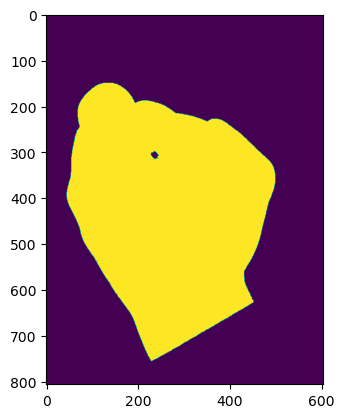

In [3]:
template0 = cv2.imread('zero.jpg')

h0, w0 = template0.shape[:-1]
print(h0,w0)
template0 = cv2.resize(template0, (int(w0 * 0.2), int(h0 * 0.2)))
template0 = my_skin_detect(template0)
(tH0, tW0) = template0.shape[:2]
plt.imshow(template0)
print(tH0,tW0)

4032 3024
806 604


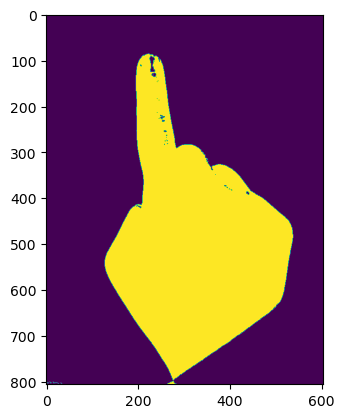

In [4]:
template1 = cv2.imread('one.jpg')

h1, w1 = template1.shape[:-1]
print(h1,w1)
template1 = cv2.resize(template1, (int(w1 * 0.2), int(h1 * 0.2)))
template1 = my_skin_detect(template1)
(tH1, tW1) = template1.shape[:2]
plt.imshow(template1)
print(tH1,tW1)

4032 3024
806 604


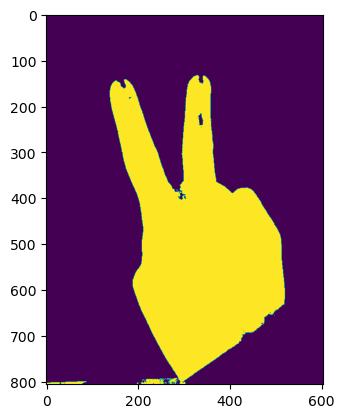

In [5]:
template2 = cv2.imread('two.jpg')

h2, w2 = template2.shape[:-1]
print(h2,w2)
template2 = cv2.resize(template2, (int(w2 * 0.2), int(h2 * 0.2)))
template2 = my_skin_detect(template2)
(tH2, tW2) = template2.shape[:2]
plt.imshow(template2)
print(tH2,tW2)

4032 3024
806 604


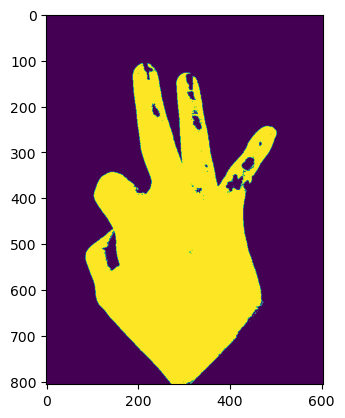

In [6]:
template3 = cv2.imread('three.jpg')

h3, w3 = template3.shape[:-1]
print(h3,w3)
template3 = cv2.resize(template3, (int(w3 * 0.2), int(h3 * 0.2)))
template3 = my_skin_detect(template3)
(tH3, tW3) = template3.shape[:2]
plt.imshow(template3)
print(tH3,tW3)

In [10]:
cap = cv2.VideoCapture(0)
threshold = 0.5
text = ['zero','one','two','three']

# if not successful, exit program
if not cap.isOpened():
    print("Cannot open the video cam")
    sys.exit()

# create a window called "MyVideo0"
cv2.namedWindow("MyVideo0", cv2.WINDOW_AUTOSIZE)

# read a new frame from video
ret, frame0 = cap.read()
if not ret:
    print("Cannot read a frame from video stream")

cv2.namedWindow("gray", cv2.WINDOW_AUTOSIZE)

r=1

while(1):
    # read a new frame from video
    ret, frame = cap.read()
    #image2 = copy.deepcopy(frame)
    # if not successful, break loop
    if not ret:
        print("Cannot read a frame from video stream")
        break

    gray = my_skin_detect(frame)

    vals = []
    locs = []
    
#--------------------------------------------------------------------------
    #multi-template

    #template0
    result0 = cv2.matchTemplate(gray, template0, cv2.TM_CCOEFF_NORMED)
    min_val0, max_val0, min_loc0, max_loc0 = cv2.minMaxLoc(result0)
    print(f'max_val0:{max_val0}')
    vals.append(max_val0)
    locs.append(max_loc0)

    #template1
    result1 = cv2.matchTemplate(gray, template1, cv2.TM_CCOEFF_NORMED)
    min_val1, max_val1, min_loc1, max_loc1 = cv2.minMaxLoc(result1)
    print(f'max_val1:{max_val1}')
    vals.append(max_val1)
    locs.append(max_loc1)

    #template2
    result2 = cv2.matchTemplate(gray, template2, cv2.TM_CCOEFF_NORMED)
    min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(result2)
    print(f'max_val2:{max_val2}')
    vals.append(max_val2)
    locs.append(max_loc2)

    #template3
    result3 = cv2.matchTemplate(gray, template3, cv2.TM_CCOEFF_NORMED)
    min_val3, max_val3, min_loc3, max_loc3 = cv2.minMaxLoc(result3)
    print(f'max_val3:{max_val3}')
    vals.append(max_val3)
    locs.append(max_loc3)

#--------------------------------------------------------------------------

    obs=vals.index(max(vals))
    
    (startX, startY) = (int(locs[obs][0]*1), int(locs[obs][1] * 1))
    (endX, endY) = (int((locs[obs][0] + tW1 * r)), int((locs[obs][1] + tH1*r)))

    # the red tectangle will appear when the max_val >= threshold
    if vals[obs]>= threshold:
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(frame, text[obs], (startX, startY),cv2.FONT_HERSHEY_SIMPLEX , 2, (0,0,255), 5)
        
        cv2.rectangle(gray, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(gray, text[obs], (startX, startY),cv2.FONT_HERSHEY_SIMPLEX , 2, (255,255,255), 5)
        

    cv2.imshow("frame", frame)
    cv2.imshow("gray", gray)
    
    if cv2.waitKey(30) == 27:
        print("esc key is pressed by user")
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)


Cannot read a frame from video stream
Cannot read a frame from video stream


-1

In [8]:
template = cv2.imread('IMG_8187.jpg')

#h1, w1 = template.shape[:-1]
#print(h1,w1)
#template = cv2.resize(template, (int(w1 * 0.2), int(h1 * 0.2)))
template = my_skin_detect(template)
(tH, tW) = template.shape[:2]
plt.imshow(template)
print(tH,tW)

[ WARN:0@70.767] global loadsave.cpp:248 findDecoder imread_('IMG_8187.jpg'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

In [ ]:
cap = cv2.VideoCapture(0)
threshold = 0.7

# if not successful, exit program
if not cap.isOpened():
    print("Cannot open the video cam")
    sys.exit()

# create a window called "MyVideo0"
cv2.namedWindow("MyVideo0", cv2.WINDOW_AUTOSIZE)

# read a new frame from video
ret, frame0 = cap.read()
if not ret:
    print("Cannot read a frame from video stream")

cv2.namedWindow("gray", cv2.WINDOW_AUTOSIZE)


while(1):
    # read a new frame from video
    ret, frame = cap.read()
    #image2 = copy.deepcopy(frame)
    # if not successful, break loop
    if not ret:
        print("Cannot read a frame from video stream")
        break

    gray = my_skin_detect(frame)

    #found = (0,[0,0],0)
    found = None

    for scale in np.linspace(0.25, 0.1, 10):
        # 改变被检测图像大小，记录比例
        # resized = imutils.resize(gray, width=int(gray.shape[1] * scale))
        (H, W) = frame.shape[:2]
        resized = cv2.resize(template, (int(w1 * scale), int(h1 * scale)))
        #resized = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        (tH, tW) = template.shape[:2]
        r = scale

        # 如果图像小于模板图像 就应当停止
        if resized.shape[0] > H or resized.shape[1] > W:
            break
        # 获得被检测图像边缘信息 与模板进行匹配
        #edged = cv2.Canny(resized, 100, 200)
        result = cv2.matchTemplate(gray, resized, cv2.TM_CCOEFF_NORMED)
        # print(f'result,{result.shape}')

        # 获取最大值 以及对应坐标
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        
        # 与之前的结果比较
        if found is None:
            found = (max_val, max_loc, r)
        elif  max_val > found[0]:
            found = (max_val, max_loc, r)


    (max_val, max_loc, r) = found
    (startX, startY) = (int(max_loc[0]*1), int(max_loc[1] * 1))
    (endX, endY) = (int((max_loc[0] + tW * r)), int((max_loc[1] + tH*r)))

    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.imshow("frame", frame)
    cv2.rectangle(gray, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.imshow("gray", frame)

    # the red tectangle will appear when the max_val >= threshold
    if max_val>= threshold:
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.rectangle(gray, (startX, startY), (endX, endY), (0, 0, 255), 2)
        

    cv2.imshow("frame", frame)
    cv2.imshow("gray", frame)
    
    if cv2.waitKey(30) == 27:
        print("esc key is pressed by user")
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
